In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from fbprophet import Prophet
from datetime import datetime
import pandas_datareader as pdr

## prophet 모듈을 이용한 forecast예측

In [5]:
pinkwink_web = pd.read_csv('./data/PinkWink Web Traffic.csv', 
                            encoding='utf-8', thousands=',',
                            names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


In [6]:
df = pd.DataFrame({'ds': pinkwink_web.index, 'y':pinkwink_web['hit']}) # pinkwink_web변수에서 날짜(index)와 방문수(hit)만 따로 저장
df.reset_index(inplace=True)
df['ds']= pd.to_datetime(df['ds'], format='%y. %m. %d.') #pandas에서 지원하는 to_datetime 함수를 사용하여 날짜라고 선언
del df['date']

m = Prophet(yearly_seasonality=True) # prophet 함수를 사용할때 주기성이 연단위(yearly_seasonality)로 있다고 알려줌
m.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
# 60일간의 데이터를 예측시 make_future_dataframe
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [8]:
forecast = m.predict(future) # forecast 변수에 예측한 데이터 저장
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,908.312485,671.087080,1102.103389
421,2017-08-26,493.269868,281.884146,696.017592
422,2017-08-27,625.855539,411.584737,822.134047
423,2017-08-28,1178.497203,963.742402,1389.541376
424,2017-08-29,1214.444999,992.533705,1417.834497


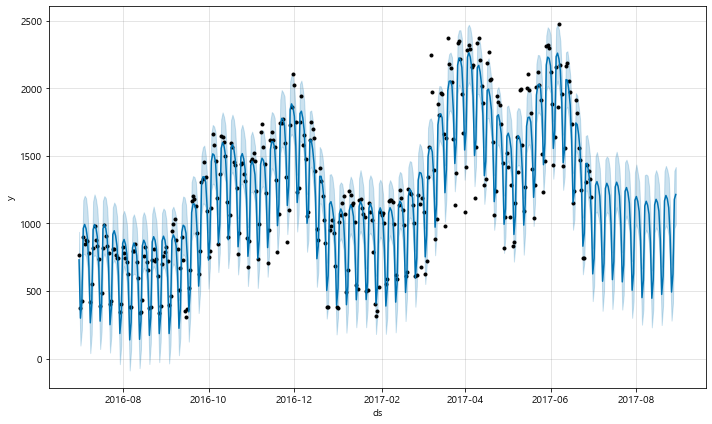

In [9]:
# 2017/06 말까지 데이터 이후 약 2개월(60일)의 예측결과
m.plot(forecast);

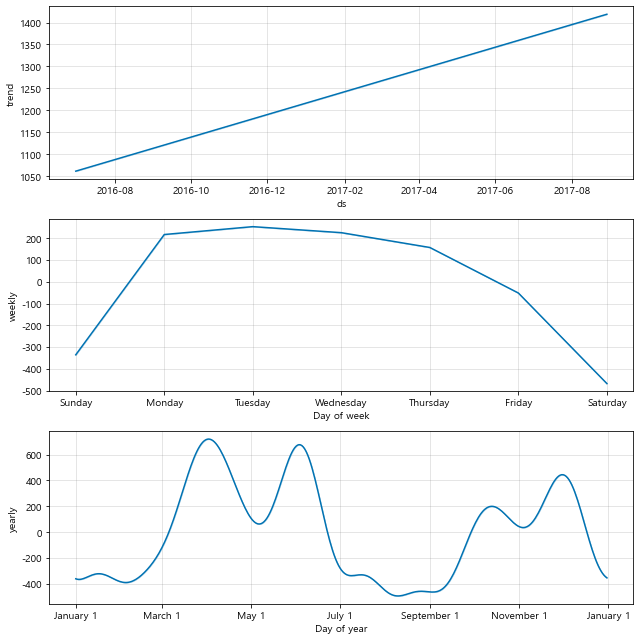

In [10]:
m.plot_components(forecast);

### seasonal 시계열 분석으로 주식데이터 분석

## 기아자동차 주식

In [4]:
# 기아자동차(000270)의 2013/1/1일부터 2020/12/04일까지 주가정보를 받음
start = datetime(2013, 1, 1)
end = datetime(2020, 12, 4)
kia = pdr.DataReader('000270.KS', data_source='yahoo', start=start, end=end) 
# data_source : 주가 정보를 받을 사이트* google가 안되서 yahoo사이트로 받음
kia.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,57400.0,56000.0,57000.0,56300.0,2145047.0,56300.0
2013-01-03,56700.0,54100.0,56300.0,54600.0,4392999.0,54600.0
2013-01-04,54600.0,52700.0,54300.0,53600.0,3916692.0,53600.0
2013-01-07,54500.0,53600.0,53800.0,54000.0,2061988.0,54000.0
2013-01-08,54800.0,53700.0,53700.0,54500.0,1899832.0,54500.0


In [14]:
kia.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-30,60400.0,57800.0,58700.0,57800.0,3810442.0,57800.0
2020-12-01,60000.0,58100.0,58700.0,59800.0,1822248.0,59800.0
2020-12-02,61000.0,59400.0,60000.0,60800.0,2964672.0,60800.0
2020-12-03,64800.0,60000.0,60800.0,64700.0,4152306.0,64700.0
2020-12-04,66600.0,64300.0,65000.0,65400.0,3866516.0,65400.0


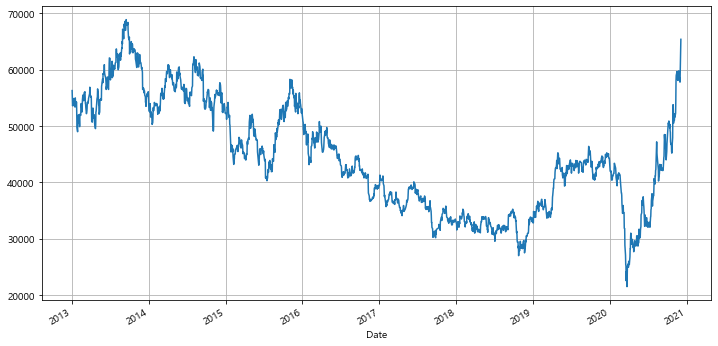

In [12]:
kia.Close.plot(figsize=(12, 6), grid=True); # 종가(Close) 기준으로 그래프를 그림
plt.show()

In [13]:
kia_trunc = kia[:'2020-06-30'] # 2020/6/30일까지 자름
kia_trunc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-24,34450.0,32550.0,32700.0,33750.0,2345625.0,33750.0
2020-06-25,33200.0,32500.0,33050.0,32550.0,1495320.0,32550.0
2020-06-26,33500.0,32850.0,33100.0,33050.0,1329381.0,33050.0
2020-06-29,32500.0,31900.0,32300.0,32100.0,1259626.0,32100.0
2020-06-30,32650.0,32050.0,32600.0,32050.0,1193847.0,32050.0


In [15]:
ddf = pd.DataFrame({'ds':kia_trunc.index, 'y': kia_trunc.Close})
ddf.reset_index(inplace=True)
del ddf['Date']
ddf.head()

,ds,y
0,2013-01-02,56300.0
1,2013-01-03,54600.0
2,2013-01-04,53600.0
3,2013-01-07,54000.0
4,2013-01-08,54500.0


In [16]:
# 모델학습
model = Prophet(daily_seasonality=True)
model.fit(ddf)

In [17]:
# 157일까지 정보를 예측
future = model.make_future_dataframe(periods=157)
future.tail()

,ds
1988,2020-11-30
1989,2020-12-01
1990,2020-12-02
1991,2020-12-03
1992,2020-12-04


In [18]:
forecast = model.predict(future)

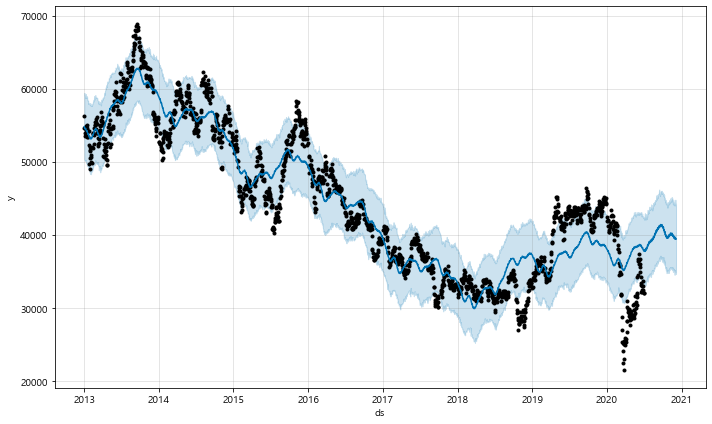

In [19]:
model.plot(forecast);

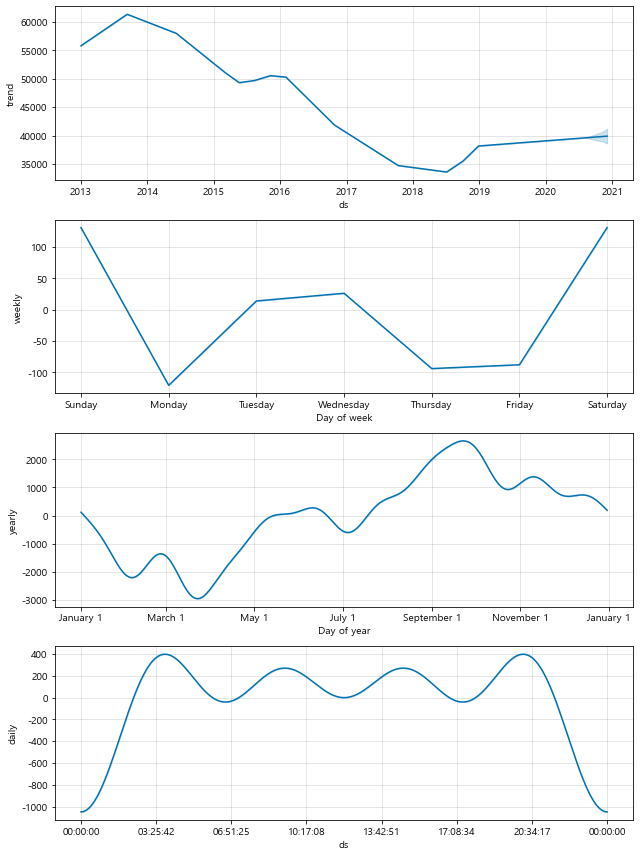

In [20]:
# 요소별로 확인
model.plot_components(forecast);

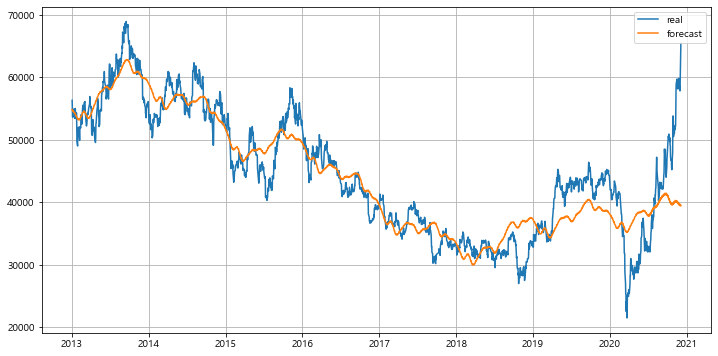

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(kia.index, kia.Close, label='real')
plt.plot(forecast.ds, forecast.yhat, label='forecast')
plt.grid()
plt.legend()
plt.show()

### 삼성전자 주식

In [23]:
start = datetime(2013, 1, 1)
end = datetime(2020, 12, 4)
sam = pdr.DataReader('005930.KS', data_source='yahoo', start=start, end=end)
sam.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,31520.0,30540.0,30660.0,31520.0,11449650.0,41.799534
2013-01-03,31680.0,30860.0,31640.0,30860.0,14227400.0,40.924290
2013-01-04,30840.0,30200.0,30800.0,30500.0,12999800.0,40.446884
2013-01-07,30560.0,30000.0,30300.0,30400.0,12610950.0,40.314274
2013-01-08,30340.0,29960.0,30260.0,30000.0,13822250.0,39.783821


In [24]:
sam.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-30,68600.0,66700.0,68400.0,66700.0,43811016.0,66700.0
2020-12-01,68300.0,67100.0,67100.0,67800.0,22327173.0,67800.0
2020-12-02,69900.0,68300.0,68400.0,69500.0,29703942.0,69500.0
2020-12-03,70500.0,69300.0,70100.0,69700.0,23677989.0,69700.0
2020-12-04,72100.0,70100.0,70400.0,71500.0,28130533.0,71500.0


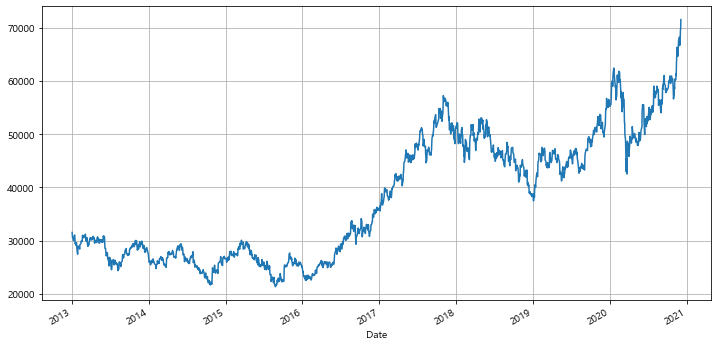

In [25]:
sam.Close.plot(figsize=(12,6), grid=True)
plt.show()

In [26]:
sam_trunc = sam[:'2020-06-30']
sam_trunc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-24,53900.0,51600.0,51900.0,52900.0,24519552.0,52900.0
2020-06-25,53000.0,51900.0,52100.0,51900.0,18541624.0,51900.0
2020-06-26,53900.0,52200.0,52800.0,53300.0,21575360.0,53300.0
2020-06-29,53200.0,52000.0,52500.0,52400.0,17776925.0,52400.0
2020-06-30,53900.0,52800.0,53900.0,52800.0,21157172.0,52800.0


In [27]:
sam_df = pd.DataFrame({'ds': sam_trunc.index, 'y': sam_trunc.Close})
sam_df.reset_index(inplace=True)
del sam_df['Date']
sam_df.head()

,ds,y
0,2013-01-02,31520.0
1,2013-01-03,30860.0
2,2013-01-04,30500.0
3,2013-01-07,30400.0
4,2013-01-08,30000.0


In [29]:
# 삼성 모델학습
sam_model = Prophet(daily_seasonality=True)
sam_model.fit(sam_df)

In [30]:
sam_trunc = sam_model.make_future_dataframe(periods=157)
sam_trunc.tail()

,ds
1988,2020-11-30
1989,2020-12-01
1990,2020-12-02
1991,2020-12-03
1992,2020-12-04


In [31]:
sam_forecast = sam_model.predict(sam_trunc)

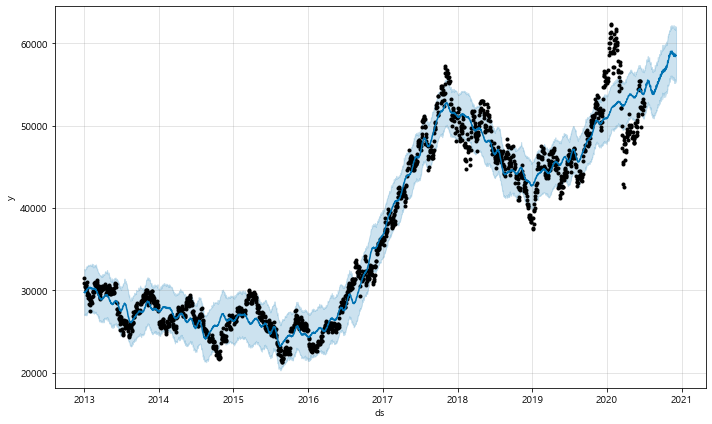

In [32]:
sam_model.plot(sam_forecast);

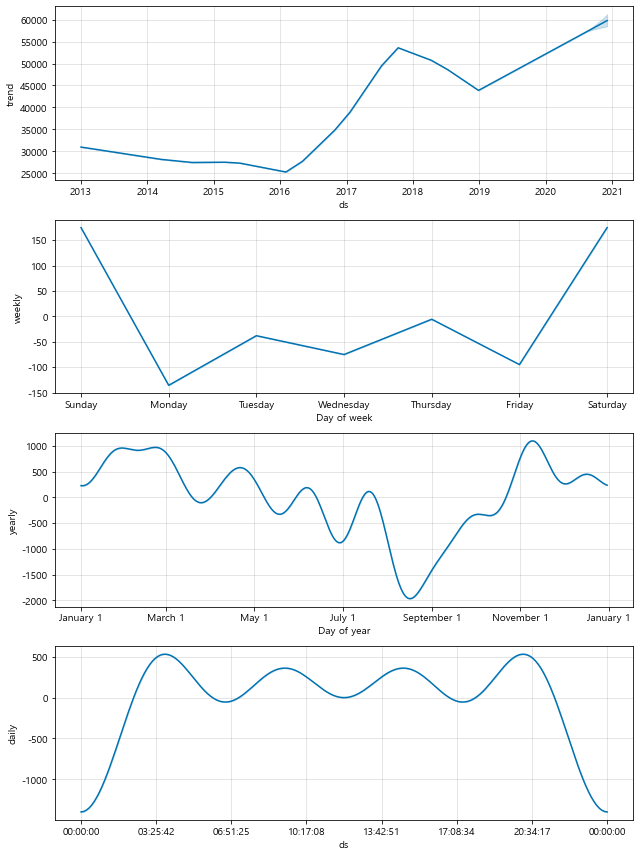

In [33]:
sam_model.plot_components(sam_forecast);

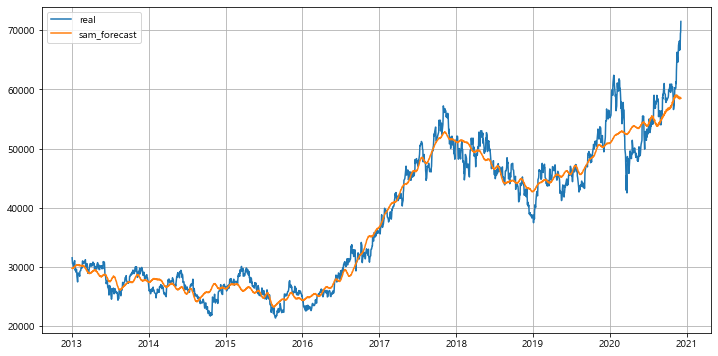

In [34]:
plt.figure(figsize=(12,6))
plt.plot(sam.index, sam.Close, label='real')
plt.plot(sam_forecast.ds, sam_forecast.yhat, label='sam_forecast')
plt.grid()
plt.legend()
plt.show()